In [1]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from datetime import datetime
import scipy.stats as stats
import pandas as pd

In [3]:
# Ruta al archivo CSV
file_path = '/content/drive/MyDrive/Trabajo_final-Master_en_Big_Data/Datos/datos_2024/ocupacion_2024.csv'

# Leer el archivo CSV
ocupacion_historica = pd.read_csv(file_path)

# Mostrar los primeros registros
ocupacion_historica.head()

,id,cod_empresa,linea_codigo,sevar_codigo,dia,franja_horaria,ascensos_promedio,ocupacion_promedio,ocupacion_maxima_promedio,ocupacion_maxima,cantidad,tipo_dia
0,20240101,50,76,3267,2024-01-01,84,5.0,0.916667,4.0,4,1,FERIADO NO LABORABLE
1,20240101,50,78,4016,2024-01-01,88,5.0,1.709091,5.0,5,1,FERIADO NO LABORABLE
2,20240101,50,45,3983,2024-01-01,89,3.0,0.690476,3.0,3,1,FERIADO NO LABORABLE
3,20240101,50,45,3973,2024-01-01,90,3.0,0.482759,2.0,2,1,FERIADO NO LABORABLE
4,20240101,50,40,7883,2024-01-01,90,1.0,0.272727,1.0,1,1,FERIADO NO LABORABLE


In [4]:
max_fecha_ocupacion = ocupacion_historica['dia'].max()
print('maximo fecha ocupacion:', max_fecha_ocupacion)

min_fecha_ocupacion = ocupacion_historica['dia'].min()
print('minimo fecha ocupacion:', min_fecha_ocupacion)

maximo fecha ocupacion: 2024-12-31
minimo fecha ocupacion: 2024-01-01


In [65]:
#precipitaciones = pd.read_csv('/content/drive/MyDrive/Trabajo_final-Master_en_Big_Data/Datos/pluviometros.csv')
#precipitaciones = pd.read_csv('/content/drive/MyDrive/Trabajo_final-Master_en_Big_Data/Datos/datos_2024/acc_2024.csv',
#                              encoding='latin-1')
precipitaciones = pd.read_csv('/content/drive/MyDrive/Trabajo_final-Master_en_Big_Data/Datos/datos_2024/acc_2024_2.csv',
                              encoding='latin-1')
precipitaciones.head()

,nombre,fecha,instant_precipitation,ac_15,ac_1440
0,Capurro,2024-01-01T00:00:00.000-03,0.0,0.0,0.0
1,Capurro,2024-01-01T00:05:00.000-03,0.0,0.0,0.0
2,Capurro,2024-01-01T00:10:00.000-03,0.0,0.0,0.0
3,Capurro,2024-01-01T00:15:00.000-03,0.0,0.0,0.0
4,Capurro,2024-01-01T00:20:00.000-03,0.0,0.0,0.0


In [110]:
print(precipitaciones.columns)


Index(['nombre', 'fecha', 'instant_precipitation', 'ac_15', 'ac_1440'], dtype='object')


In [111]:
print(precipitaciones['nombre'].unique()) #21 estaciones diferentes

['Capurro' 'Carrasco' 'Casavalle' 'Centro' 'Cerro' 'Ciudad Vieja' 'Colón'
 'Curva de Maroñas' 'Estación Meteorológica - Colón'
 'Estación Meteorológica - Paso de la Aren' 'Felipe Cardoso'
 'La Blanqueada' 'La Esperanza' 'La Paloma' 'Lezica' 'Malvin' 'Manga'
 'Paso de la Arena' 'Prado' 'Punta Carretas' 'Santiago Vázquez']


In [6]:
max_fecha_precipitaciones = precipitaciones['fecha'].max()
print('maximo fecha precipitaciones:', max_fecha_precipitaciones)

min_fecha_precipitaciones = precipitaciones['fecha'].min()
print('minimo fecha precipitaciones:', min_fecha_precipitaciones)

maximo fecha precipitaciones: 2025-01-01T00:00:00.000-03
minimo fecha precipitaciones: 2024-01-01T00:00:00.000-03


In [113]:
print(ocupacion_historica.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3979672 entries, 0 to 3979671
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id                         int64  
 1   cod_empresa                int64  
 2   linea_codigo               int64  
 3   sevar_codigo               int64  
 4   dia                        object 
 5   franja_horaria             int64  
 6   ascensos_promedio          float64
 7   ocupacion_promedio         float64
 8   ocupacion_maxima_promedio  float64
 9   ocupacion_maxima           int64  
 10  cantidad                   int64  
 11  tipo_dia                   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 364.3+ MB
None


In [114]:
print(precipitaciones.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213589 entries, 0 to 2213588
Data columns (total 5 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   nombre                 object 
 1   fecha                  object 
 2   instant_precipitation  float64
 3   ac_15                  float64
 4   ac_1440                float64
dtypes: float64(3), object(2)
memory usage: 84.4+ MB
None


In [7]:
#Se convierten todos los valores de ocupacion_promedio menores a 0 en 0 para corregir los datos según lo explicado por los técnicos de IM
ocupacion_historica.loc[ocupacion_historica['ocupacion_promedio'] < 0, 'ocupacion_promedio'] = 0

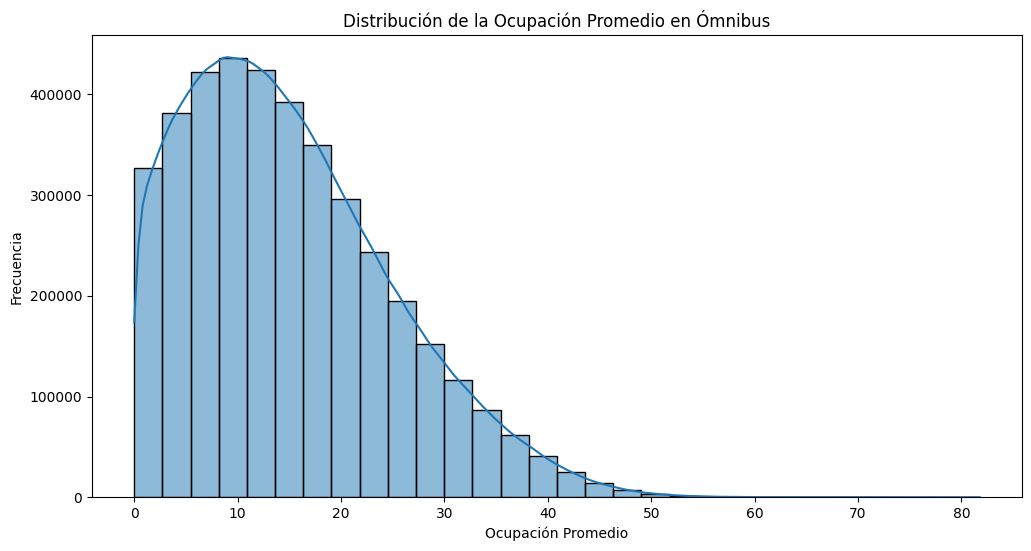

In [8]:
# Configuración de gráficos
plt.figure(figsize=(12,6))
sns.histplot(ocupacion_historica["ocupacion_promedio"], bins=30, kde=True)
plt.title("Distribución de la Ocupación Promedio en Ómnibus")
plt.xlabel("Ocupación Promedio")
plt.ylabel("Frecuencia")
plt.show()

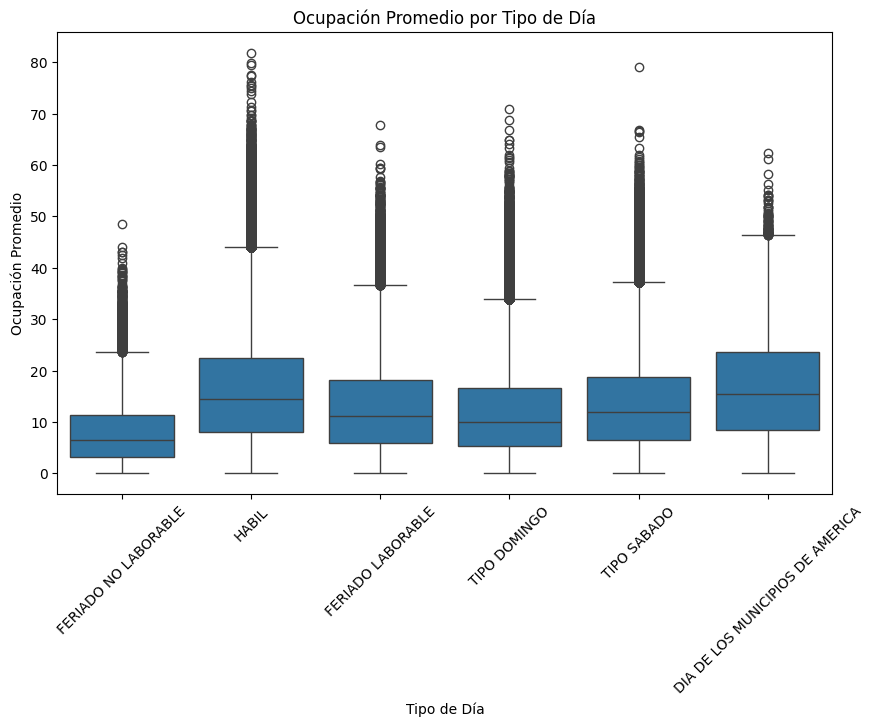

In [9]:
# Boxplot por tipo de día
plt.figure(figsize=(10,6))
sns.boxplot(x="tipo_dia", y="ocupacion_promedio", data=ocupacion_historica)
plt.title("Ocupación Promedio por Tipo de Día")
plt.xlabel("Tipo de Día")
plt.ylabel("Ocupación Promedio")
plt.xticks(rotation=45)
plt.show()

In [10]:
dia_municipios = ocupacion_historica['dia'][ocupacion_historica['tipo_dia'] == 'DIA DE LOS MUNICIPIOS DE AMERICA'].unique()
print(dia_municipios)

['2024-04-24']


In [11]:
#el "DIA DE LOS MUNICIPIOS DE AMERICA" no tiene diferencias con un día normal para el transporte, como fue día de semana se le pone día hábil
ocupacion_historica.loc[ocupacion_historica['tipo_dia'] == 'DIA DE LOS MUNICIPIOS DE AMERICA', 'tipo_dia'] = 'HABIL'

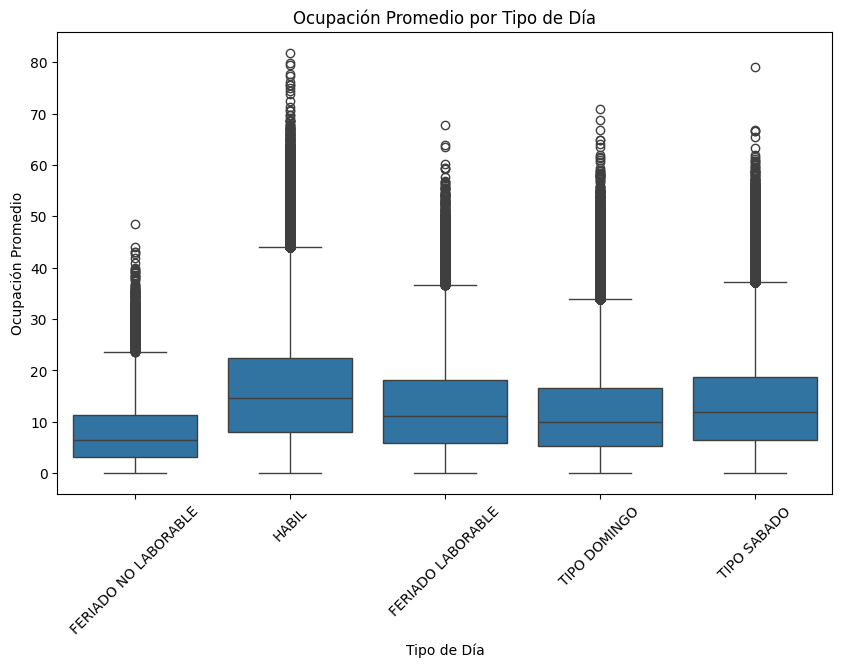

In [120]:
# Boxplot por tipo de día/ se vuelve a graficar con el cambio realizado
plt.figure(figsize=(10,6))
sns.boxplot(x="tipo_dia", y="ocupacion_promedio", data=ocupacion_historica)
plt.title("Ocupación Promedio por Tipo de Día")
plt.xlabel("Tipo de Día")
plt.ylabel("Ocupación Promedio")
plt.xticks(rotation=45)
plt.show()

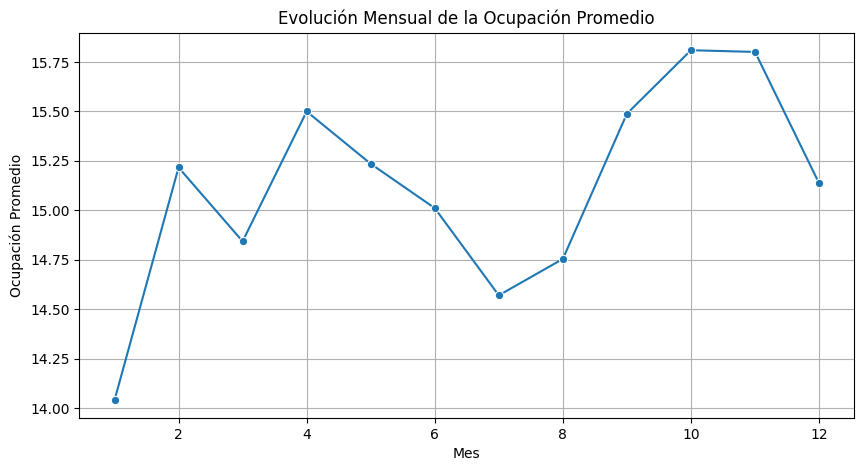

In [12]:
# Se cambia el nombre de "dia" a "fecha", se agrega columna con dia de la semana y mes
ocupacion_historica.rename(columns={'dia': 'fecha'}, inplace=True)
ocupacion_historica['fecha'] = pd.to_datetime(ocupacion_historica['fecha'])

ocupacion_historica["mes"] = ocupacion_historica["fecha"].dt.month
ocupacion_historica["dia_semana"] = ocupacion_historica["fecha"].dt.day_name()

# Media de ocupación por mes
ocupacion_mensual = ocupacion_historica.groupby("mes")["ocupacion_promedio"].mean()
# Media de ocupación por dia de la semana
ocupacion_dia = ocupacion_historica.groupby("dia_semana")["ocupacion_promedio"].mean()

# Graficar ocupación mensual
plt.figure(figsize=(10,5))
sns.lineplot(x=ocupacion_mensual.index, y=ocupacion_mensual.values, marker="o")
plt.title("Evolución Mensual de la Ocupación Promedio")
plt.xlabel("Mes")
plt.ylabel("Ocupación Promedio")
plt.grid()
plt.show()


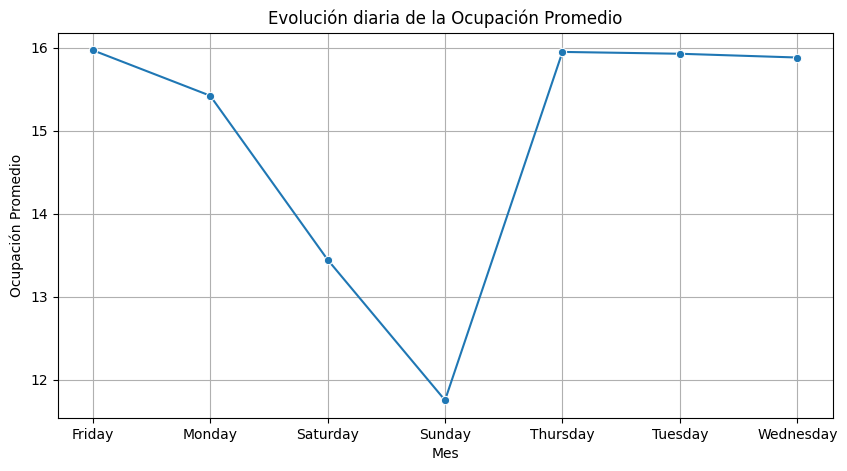

In [13]:
# Graficar ocupación diaria
plt.figure(figsize=(10,5))
sns.lineplot(x=ocupacion_dia.index, y=ocupacion_dia.values, marker="o")
plt.title("Evolución diaria de la Ocupación Promedio")
plt.xlabel("Mes")
plt.ylabel("Ocupación Promedio")
plt.grid()
plt.show()

In [122]:
ocupacion_historica.columns

Index(['id', 'cod_empresa', 'linea_codigo', 'sevar_codigo', 'fecha',
       'franja_horaria', 'ascensos_promedio', 'ocupacion_promedio',
       'ocupacion_maxima_promedio', 'ocupacion_maxima', 'cantidad', 'tipo_dia',
       'mes', 'dia_semana'],
      dtype='object')

In [14]:
# Creamos un diccionario para mapear del inglés al español
map_days = {
    "Monday": "Lunes",
    "Tuesday": "Martes",
    "Wednesday": "Miércoles",
    "Thursday": "Jueves",
    "Friday": "Viernes",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
}

# Reemplazamos los valores
ocupacion_historica["dia_semana"] = ocupacion_historica["dia_semana"].replace(map_days)

<ipython-input-15-7b543f23b9ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ocupacion_dia.index, y=ocupacion_dia.values, palette="Blues_r")


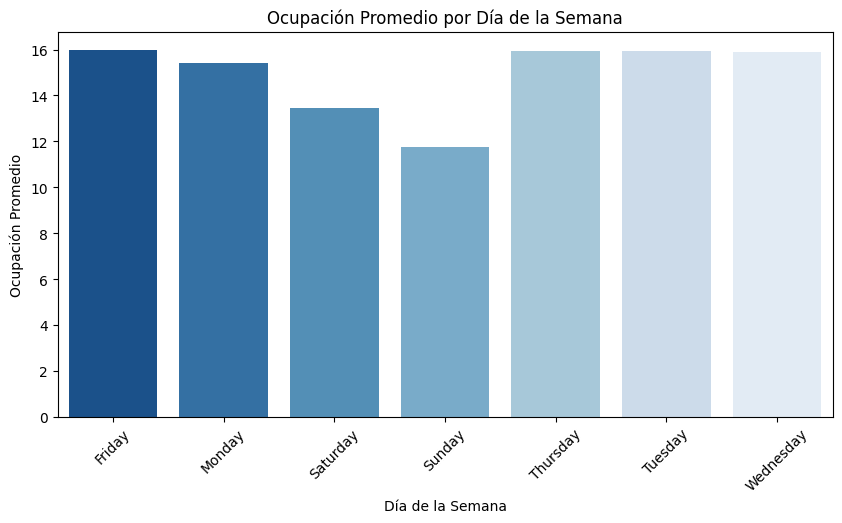

In [15]:
# Graficar ocupación promedio por día de la semana
plt.figure(figsize=(10,5))
sns.barplot(x=ocupacion_dia.index, y=ocupacion_dia.values, palette="Blues_r")
plt.title("Ocupación Promedio por Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Ocupación Promedio")
plt.xticks(rotation=45)
plt.show()

In [16]:
# Definimos el orden deseado
dias_ordenados = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
# Calcular estadísticas descriptivas por día de la semana
ocupacion_estadisticas = ocupacion_historica.groupby("dia_semana")["ocupacion_promedio"].describe().reindex(dias_ordenados)

# Mostrar la tabla de estadísticas descriptivas
print(ocupacion_estadisticas)

               count       mean        std  min       25%        50%  \
dia_semana                                                             
Lunes       623176.0  15.420668  10.018787  0.0  7.541667  13.977273   
Martes      616147.0  15.926258  10.271735  0.0  7.851852  14.511037   
Miércoles   603651.0  15.880850  10.205484  0.0  7.860465  14.489362   
Jueves      623220.0  15.948358  10.163353  0.0  8.000000  14.578947   
Viernes     629763.0  15.968744  10.040163  0.0  8.147059  14.639175   
Sábado      491984.0  13.444920   8.966608  0.0  6.536585  11.954545   
Domingo     391731.0  11.751350   8.598402  0.0  5.157895   9.943662   

                  75%        max  
dia_semana                        
Lunes       21.740741  73.786885  
Martes      22.476190  75.611111  
Miércoles   22.403474  79.785714  
Jueves      22.475844  81.757576  
Viernes     22.381443  77.360656  
Sábado      18.777778  79.000000  
Domingo     16.500000  70.962963  


In [ ]:
ocupacion_historica.describe()

,id,cod_empresa,linea_codigo,sevar_codigo,fecha,franja_horaria,ascensos_promedio,ocupacion_promedio,ocupacion_maxima_promedio,ocupacion_maxima,cantidad,mes
count,3.979672e+06,3.979672e+06,3.979672e+06,3.979672e+06,3979672,3.979672e+06,3.979672e+06,3.979672e+06,3.979672e+06,3.979672e+06,3.979672e+06,3.979672e+06
mean,2.024068e+07,4.456980e+01,1.567951e+02,4.676961e+03,2024-07-04 12:43:01.879510528,5.327451e+01,5.189674e+01,1.513268e+01,2.814725e+01,2.963765e+01,1.204486e+00,6.616281e+00
min,2.024010e+07,1.000000e+01,1.000000e+00,8.000000e+00,2024-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+00,-5.000000e+00,1.000000e+00,1.000000e+00
25%,2.024041e+07,5.000000e+01,3.400000e+01,2.409000e+03,2024-04-08 00:00:00,3.700000e+01,2.300000e+01,7.313433e+00,1.450000e+01,1.500000e+01,1.000000e+00,4.000000e+00
50%,2.024070e+07,5.000000e+01,8.300000e+01,4.429000e+03,2024-07-05 00:00:00,5.300000e+01,4.533333e+01,1.361702e+01,2.600000e+01,2.700000e+01,1.000000e+00,7.000000e+00
75%,2.024100e+07,5.000000e+01,1.400000e+02,7.884000e+03,2024-10-02 00:00:00,7.000000e+01,7.400000e+01,2.135294e+01,4.000000e+01,4.200000e+01,1.000000e+00,1.000000e+01
max,2.024123e+07,7.000000e+01,5.080000e+02,8.875000e+03,2024-12-31 00:00:00,9.500000e+01,2.810000e+02,8.175758e+01,1.000000e+02,1.000000e+02,2.500000e+01,1.200000e+01
std,3.378448e+02,1.591155e+01,1.753377e+02,2.755221e+03,NaN,2.112360e+01,3.655270e+01,9.954064e+00,1.725535e+01,1.828793e+01,5.088521e-01,3.375670e+00


In [59]:
precipitaciones['fecha'] = pd.to_datetime(precipitaciones['fecha'])
precipitaciones['fecha'] = precipitaciones['fecha'].dt.date
precipitaciones.head()

,nombre,fecha,instant_precipitation,ac_15,ac_1440
0,Capurro,2024-01-01,0.0,0.0,0.0
1,Capurro,2024-01-01,0.0,0.0,0.0
2,Capurro,2024-01-01,0.0,0.0,0.0
3,Capurro,2024-01-01,0.0,0.0,0.0
4,Capurro,2024-01-01,0.0,0.0,0.0


In [19]:
# Agrupamos por estación y día, sumando la precipitación de cada intervalo
df_sum_estacion = (
    precipitaciones.groupby(['nombre', 'fecha'], as_index=False)
      .agg({'ac_15': 'sum'})
)

# 3) Volver a agrupar, esta vez solo por día, promediando entre estaciones
df_diario = (
    df_sum_estacion.groupby('fecha', as_index=False)
                  .agg({'ac_15': 'mean'})
)

In [20]:
df_diario['fecha_dia'] = df_diario['fecha']

In [21]:
df_diario.head()

,fecha,ac_15,fecha_dia
0,2024-01-01,0.000000,2024-01-01
1,2024-01-02,0.399143,2024-01-02
2,2024-01-03,0.000000,2024-01-03
3,2024-01-04,0.000000,2024-01-04
4,2024-01-05,0.252857,2024-01-05


In [22]:
df_filtrado = ocupacion_historica[[
    "linea_codigo",
    "fecha",
    "ocupacion_promedio",
    "tipo_dia",
    "mes",
    "dia_semana"
]]


#    para mantenerlas en el resultado final). Obtenemos la media de ocupacion_promedio.
ocupacion_diaria = (
    df_filtrado
    .groupby(["linea_codigo", "fecha", "tipo_dia", "mes", "dia_semana"], as_index=False)
    .agg({"ocupacion_promedio": "mean"})
)

In [23]:
ocupacion_diaria.head()

,linea_codigo,fecha,tipo_dia,mes,dia_semana,ocupacion_promedio
0,1,2024-01-02,HABIL,1,Martes,10.843625
1,1,2024-01-03,HABIL,1,Miércoles,14.030901
2,1,2024-01-04,HABIL,1,Jueves,14.571309
3,1,2024-01-05,HABIL,1,Viernes,16.238288
4,1,2024-01-06,FERIADO LABORABLE,1,Sábado,7.926678


In [24]:
ocupacion_diaria['fecha'] = ocupacion_diaria['fecha'].dt.date

In [25]:
#precipitaciones_dia["fecha_dia"] = pd.to_datetime(precipitaciones_dia["fecha_dia"])

# Unir con la ocupación
df_merged = ocupacion_diaria.merge(df_diario, left_on="fecha", right_on="fecha_dia", how="left")

# Eliminar columna redundante
df_merged.drop(columns=["fecha_dia"], inplace=True)

In [26]:
df_merged.head()

,linea_codigo,fecha_x,tipo_dia,mes,dia_semana,ocupacion_promedio,fecha_y,ac_15
0,1,2024-01-02,HABIL,1,Martes,10.843625,2024-01-02,0.399143
1,1,2024-01-03,HABIL,1,Miércoles,14.030901,2024-01-03,0.000000
2,1,2024-01-04,HABIL,1,Jueves,14.571309,2024-01-04,0.000000
3,1,2024-01-05,HABIL,1,Viernes,16.238288,2024-01-05,0.252857
4,1,2024-01-06,FERIADO LABORABLE,1,Sábado,7.926678,2024-01-06,4.923143


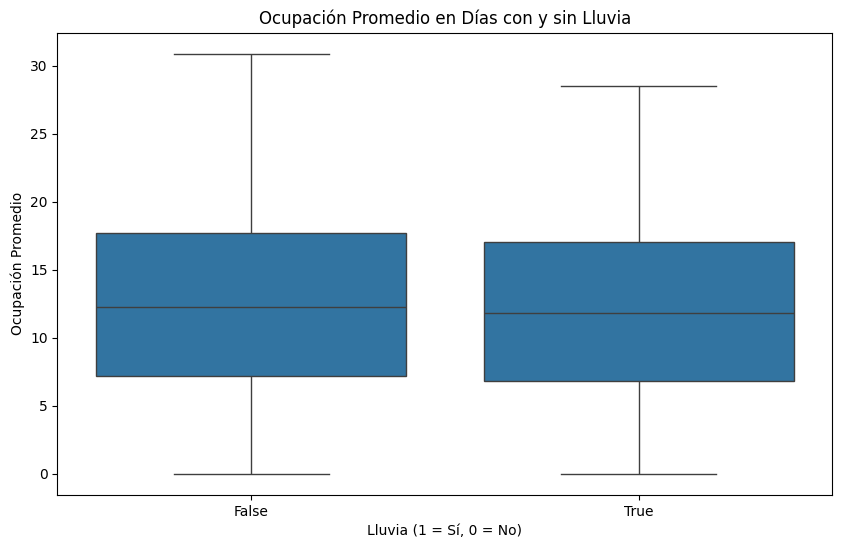

In [27]:
# Definir un umbral de lluvia, en este caso
df_merged["lluvia"] = df_merged["ac_15"] > 0

# Comparación con boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x="lluvia", y="ocupacion_promedio", data=df_merged)
plt.title("Ocupación Promedio en Días con y sin Lluvia")
plt.xlabel("Lluvia (1 = Sí, 0 = No)")
plt.ylabel("Ocupación Promedio")
plt.show()

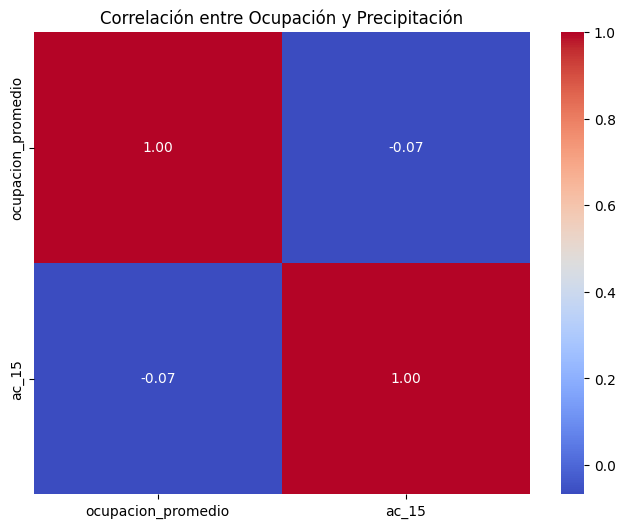

In [28]:
# Calcular correlaciones
correlaciones = df_merged[["ocupacion_promedio", "ac_15"]].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre Ocupación y Precipitación")
plt.show()

<ipython-input-29-561aa0acdece>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ocupacion_por_dia = df_merged.groupby(["dia_semana", "lluvia"])["ocupacion_promedio"].mean().unstack()


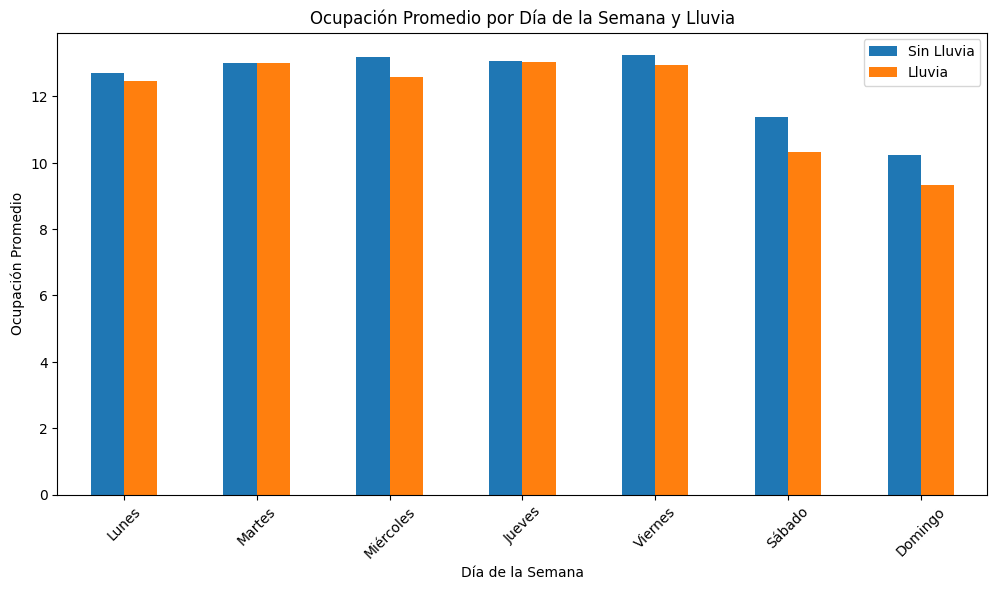

In [29]:
# Convertimos la columna dia_semana en una categoría ordenada
df_merged["dia_semana"] = pd.Categorical(
    df_merged["dia_semana"],
    categories=dias_ordenados,
    ordered=True
)

# Agrupar por día de la semana y lluvia
ocupacion_por_dia = df_merged.groupby(["dia_semana", "lluvia"])["ocupacion_promedio"].mean().unstack()

# Graficar
ocupacion_por_dia.plot(kind="bar", figsize=(12, 6))
plt.title("Ocupación Promedio por Día de la Semana y Lluvia")
plt.xlabel("Día de la Semana")
plt.ylabel("Ocupación Promedio")
plt.xticks(rotation=45)
plt.legend(["Sin Lluvia", "Lluvia"])
plt.show()

In [30]:
# Promedio de ocupación para días con y sin lluvia
promedios = df_merged.groupby("lluvia")["ocupacion_promedio"].mean()

ocupacion_sin_lluvia = promedios[False]  # promedio sin lluvia
ocupacion_con_lluvia = promedios[True]   # promedio con lluvia

diferencia = ocupacion_con_lluvia - ocupacion_sin_lluvia

print(f"Promedio sin lluvia: {ocupacion_sin_lluvia:.2f}")
print(f"Promedio con lluvia: {ocupacion_con_lluvia:.2f}")
print(f"Diferencia (lluvia - sin lluvia): {diferencia:.2f}")

# Prueba t de dos muestras (asumiendo datos independientes)
sin_lluvia = df_merged[df_merged["lluvia"] == False]["ocupacion_promedio"]
con_lluvia = df_merged[df_merged["lluvia"] == True]["ocupacion_promedio"]

t_stat, p_value = stats.ttest_ind(sin_lluvia, con_lluvia, equal_var=False)
print(f"Estadístico t: {t_stat:.3f}, p-valor: {p_value:.3f}")

Promedio sin lluvia: 12.47
Promedio con lluvia: 12.01
Diferencia (lluvia - sin lluvia): -0.46
Estadístico t: 7.805, p-valor: 0.000


In [31]:
import pandas as pd
import scipy.stats as stats


# Creamos una lista o dataframe para almacenar resultados
resultados = []

for dia in dias_ordenados:
    # Filtramos registros para el día específico
    df_dia = df_merged[df_merged["dia_semana"] == dia]

    # Promedio con y sin lluvia
    promedio_sin = df_dia[df_dia["lluvia"] == False]["ocupacion_promedio"].mean()
    promedio_con = df_dia[df_dia["lluvia"] == True]["ocupacion_promedio"].mean()
    diferencia = promedio_con - promedio_sin

    # Serie con valores para la prueba t
    sin_lluvia = df_dia[df_dia["lluvia"] == False]["ocupacion_promedio"]
    con_lluvia = df_dia[df_dia["lluvia"] == True]["ocupacion_promedio"]

    # Prueba t de dos muestras
    # equal_var=False -> asume varianzas desiguales (Welch’s t-test)
    t_stat, p_value = stats.ttest_ind(sin_lluvia, con_lluvia, equal_var=False)

    # Almacenamos el resultado
    resultados.append({
        "dia_semana": dia,
        "promedio_sin_lluvia": promedio_sin,
        "promedio_con_lluvia": promedio_con,
        "diferencia": diferencia,
        "t_stat": t_stat,
        "p_value": p_value
    })

# Convertimos a DataFrame para visualizar con claridad
df_resultados = pd.DataFrame(resultados)
print(df_resultados)


  dia_semana  promedio_sin_lluvia  promedio_con_lluvia  diferencia    t_stat  \
0      Lunes            12.715213            12.468446   -0.246767  1.581607   
1     Martes            13.019215            13.019274    0.000059 -0.000363   
2  Miércoles            13.185470            12.582568   -0.602902  3.878528   
3     Jueves            13.070107            13.044576   -0.025530  0.167107   
4    Viernes            13.262082            12.942601   -0.319482  1.974953   
5     Sábado            11.365210            10.319583   -1.045627  7.009382   
6    Domingo            10.236317             9.316064   -0.920252  6.238869   

        p_value  
0  1.138006e-01  
1  9.997103e-01  
2  1.061221e-04  
3  8.672909e-01  
4  4.832714e-02  
5  2.637555e-12  
6  4.855435e-10  


In [ ]:
import statsmodels.api as sm

# X: ac_15 (lluvia acumulada)
X = df_merged["ac_15"]
y = df_merged["ocupacion_promedio"]

# Agregamos la constante para la regresión
X_const = sm.add_constant(X)

# Definimos y entrenamos el modelo
modelo = sm.OLS(y, X_const).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:     ocupacion_promedio   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                 1.136e+04
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:17:33   Log-Likelihood:            -1.4786e+07
No. Observations:             3979672   AIC:                         2.957e+07
Df Residuals:                 3979670   BIC:                         2.957e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3157      0.005   2906.023      0.0

In [66]:
# volver a convertir el índice en columna y renombrar
precipitaciones = precipitaciones.reset_index()
precipitaciones.rename(columns={'ac_15': 'precipitacion_1h'}, inplace=True)

In [67]:
# Convierte la columna (por ejemplo "fecha") a datetime
precipitaciones['fecha'] = pd.to_datetime(precipitaciones['fecha'])

# Crea una nueva columna con la hora (0 a 23)
precipitaciones['hora'] = precipitaciones['fecha'].dt.hour

In [68]:
precipitaciones.head()

,index,nombre,fecha,instant_precipitation,precipitacion_1h,ac_1440,hora
0,0,Capurro,2024-01-01 00:00:00-03:00,0.0,0.0,0.0,0
1,1,Capurro,2024-01-01 00:05:00-03:00,0.0,0.0,0.0,0
2,2,Capurro,2024-01-01 00:10:00-03:00,0.0,0.0,0.0,0
3,3,Capurro,2024-01-01 00:15:00-03:00,0.0,0.0,0.0,0
4,4,Capurro,2024-01-01 00:20:00-03:00,0.0,0.0,0.0,0


In [69]:
precipitaciones[precipitaciones['hora'] == 2]

,index,nombre,fecha,instant_precipitation,precipitacion_1h,ac_1440,hora
24,24,Capurro,2024-01-01 02:00:00-03:00,0.0,0.0,0.0,2
25,25,Capurro,2024-01-01 02:05:00-03:00,0.0,0.0,0.0,2
26,26,Capurro,2024-01-01 02:10:00-03:00,0.0,0.0,0.0,2
27,27,Capurro,2024-01-01 02:15:00-03:00,0.0,0.0,0.0,2
28,28,Capurro,2024-01-01 02:20:00-03:00,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...
2213331,2213331,Santiago Vázquez,2024-12-31 02:35:00-03:00,0.0,0.0,0.0,2
2213332,2213332,Santiago Vázquez,2024-12-31 02:40:00-03:00,0.0,0.0,0.0,2
2213333,2213333,Santiago Vázquez,2024-12-31 02:45:00-03:00,0.0,0.0,0.0,2
2213334,2213334,Santiago Vázquez,2024-12-31 02:50:00-03:00,0.0,0.0,0.0,2


In [71]:
# Agrupamos por estación y día, sumando la precipitación de cada intervalo
df_sum_estacion_hora = (
    precipitaciones.groupby(['nombre', 'fecha', 'hora'], as_index=False)
      .agg({'precipitacion_1h': 'sum'})
)

# 3) Volver a agrupar, esta vez solo por día, promediando entre estaciones
df_hora = (
    df_sum_estacion_hora.groupby(['fecha', 'hora'], as_index=False)
                  .agg({'precipitacion_1h': 'mean'})
)

In [94]:
df_hora.head()

,fecha,hora,precipitacion_1h
0,2024-01-01 00:00:00-03:00,0,0.0
1,2024-01-01 00:05:00-03:00,0,0.0
2,2024-01-01 00:10:00-03:00,0,0.0
3,2024-01-01 00:15:00-03:00,0,0.0
4,2024-01-01 00:20:00-03:00,0,0.0


In [74]:
#se crea nueva columna dividiendo entre 4 la franja_horaria, eso nos da la hora
ocupacion_historica['hora'] = ocupacion_historica['franja_horaria']/4

In [75]:
#vamos a redondear hacia abajo las horas, para luego considerar el promedio por hora cerrada, ejemplo 0.15 se pone como 0 hs
ocupacion_historica['hora_cerrada'] = np.floor(ocupacion_historica['hora']).astype(int)

In [46]:
ocupacion_historica.head()

,id,cod_empresa,linea_codigo,sevar_codigo,fecha,franja_horaria,ascensos_promedio,ocupacion_promedio,ocupacion_maxima_promedio,ocupacion_maxima,cantidad,tipo_dia,mes,dia_semana,hora,hora_cerrada
0,20240101,50,76,3267,2024-01-01,84,5.0,0.916667,4.0,4,1,FERIADO NO LABORABLE,1,Lunes,21.00,21
1,20240101,50,78,4016,2024-01-01,88,5.0,1.709091,5.0,5,1,FERIADO NO LABORABLE,1,Lunes,22.00,22
2,20240101,50,45,3983,2024-01-01,89,3.0,0.690476,3.0,3,1,FERIADO NO LABORABLE,1,Lunes,22.25,22
3,20240101,50,45,3973,2024-01-01,90,3.0,0.482759,2.0,2,1,FERIADO NO LABORABLE,1,Lunes,22.50,22
4,20240101,50,40,7883,2024-01-01,90,1.0,0.272727,1.0,1,1,FERIADO NO LABORABLE,1,Lunes,22.50,22


In [76]:
df_ocupacion_hora = ocupacion_historica.groupby(['fecha', 'hora_cerrada', 'linea_codigo', 'tipo_dia'])['ocupacion_promedio'].mean()

# Convertimos a DataFrame normal con reset_index
df_ocupacion_hora = df_ocupacion_hora.reset_index()

In [90]:
df_ocupacion_hora['fecha'] = df_ocupacion_hora['fecha'].dt.date

In [97]:
df_hora['fecha'] = df_hora['fecha'].dt.date

In [81]:
df_ocupacion_hora.head()

,fecha,hora_cerrada,linea_codigo,tipo_dia,ocupacion_promedio
0,2024-01-01,21,76,FERIADO NO LABORABLE,0.916667
1,2024-01-01,22,40,FERIADO NO LABORABLE,0.272727
2,2024-01-01,22,45,FERIADO NO LABORABLE,0.586617
3,2024-01-01,22,76,FERIADO NO LABORABLE,2.404762
4,2024-01-01,22,78,FERIADO NO LABORABLE,1.709091


In [98]:
#precipitaciones_dia["fecha_dia"] = pd.to_datetime(precipitaciones_dia["fecha_dia"])
df_hora = df_hora.rename(columns={"hora": "hora_cerrada"})

datos_combinados = pd.merge(
    df_ocupacion_hora,
    df_hora,
    on=["fecha", "hora_cerrada"],
    how="left"  # mantiene todas las filas de df_ocupacion_hora
)

# Si deseas que los valores de precipitación faltantes se llenen con 0:
datos_combinados.fillna({"precipitacion_1h": 0}, inplace=True)

datos_combinados.head()

,fecha,hora_cerrada,linea_codigo,tipo_dia,ocupacion_promedio,precipitacion_1h
0,2024-01-01,21,76,FERIADO NO LABORABLE,0.916667,0.0
1,2024-01-01,21,76,FERIADO NO LABORABLE,0.916667,0.0
2,2024-01-01,21,76,FERIADO NO LABORABLE,0.916667,0.0
3,2024-01-01,21,76,FERIADO NO LABORABLE,0.916667,0.0
4,2024-01-01,21,76,FERIADO NO LABORABLE,0.916667,0.0


In [54]:
# Filtrar por línea 5
df_linea5 = datos_combinados[datos_combinados['linea_codigo'] == 5]
df_linea5

,fecha,hora_cerrada,linea_codigo,tipo_dia,ocupacion_promedio,precipitacion_1h
35,2024-01-02,0,5,HABIL,4.541176,8.382
76,2024-01-02,1,5,HABIL,3.324675,0.000
122,2024-01-02,2,5,HABIL,0.268293,0.000
161,2024-01-02,3,5,HABIL,2.233766,0.000
195,2024-01-02,4,5,HABIL,11.603870,0.000
...,...,...,...,...,...,...
860773,2024-12-31,14,5,HABIL,13.976987,0.000
860895,2024-12-31,15,5,HABIL,13.217055,0.000
861015,2024-12-31,16,5,HABIL,9.000320,0.000
861138,2024-12-31,17,5,HABIL,10.647836,0.000


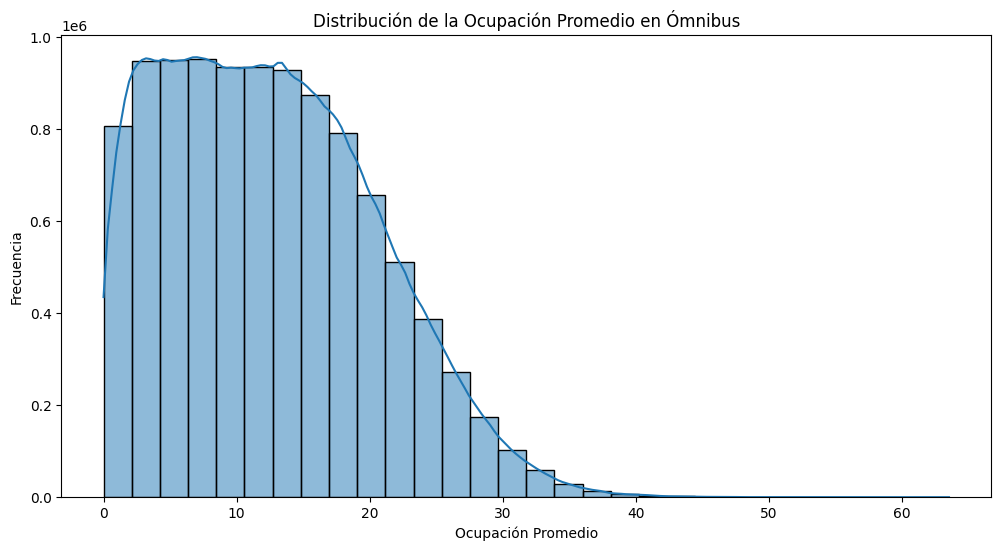

In [99]:
# Configuración de gráficos
plt.figure(figsize=(12,6))
sns.histplot(datos_combinados["ocupacion_promedio"], bins=30, kde=True)
plt.title("Distribución de la Ocupación Promedio en Ómnibus")
plt.xlabel("Ocupación Promedio")
plt.ylabel("Frecuencia")
plt.show()

<ipython-input-100-12192f0d37aa>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_combinados.groupby(["hora_cerrada", "lluvia"])["ocupacion_promedio"]


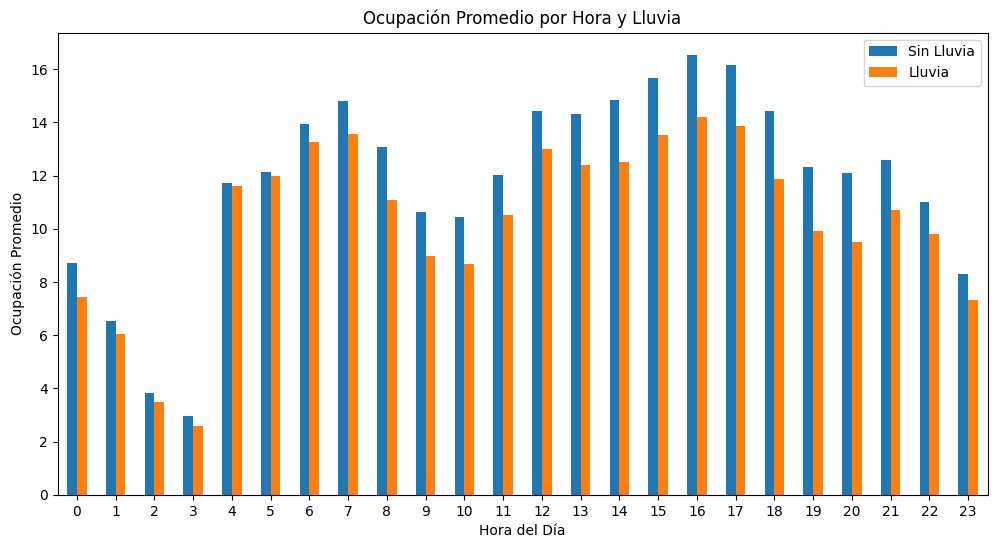

In [100]:
# Asegúrate de que la columna "hora" sea numérica o un tipo categórico ordenado
datos_combinados['hora_cerrada'] = pd.Categorical(
    datos_combinados['hora_cerrada'],
    categories=list(range(24)),  # horas de 0 a 23
    ordered=True
)

# Definir un umbral de lluvia, en este caso
datos_combinados["lluvia"] = datos_combinados["precipitacion_1h"] > 0

# Agrupa por [hora, lluvia] y calcula el promedio de ocupacion
ocupacion_hora = (
    datos_combinados.groupby(["hora_cerrada", "lluvia"])["ocupacion_promedio"]
           .mean()
           .unstack()  # Pasa la columna "lluvia" a columnas (True/False)
)

# Genera el gráfico
ocupacion_hora.plot(kind="bar", figsize=(12, 6))
plt.title("Ocupación Promedio por Hora y Lluvia")
plt.xlabel("Hora del Día")
plt.ylabel("Ocupación Promedio")
plt.xticks(rotation=0)  # Mantén las horas de forma horizontal
plt.legend(["Sin Lluvia", "Lluvia"])
plt.show()